(60000, 28, 28, 1)
(10000, 28, 28, 1)


C:\Users\harsh kankariya\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


C:\Users\harsh kankariya\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 72ms/step - accuracy: 0.9061 - loss: 1.3734
Epoch 2/5


C:\Users\harsh kankariya\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 209s 112ms/step - accuracy: 0.9753 - loss: 0.0857
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 130s 69ms/step - accuracy: 0.9833 - loss: 0.0529
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 152s 81ms/step - accuracy: 0.9858 - loss: 0.0446
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 165s 88ms/step - accuracy: 0.9886 - loss: 0.0352
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.9755 - loss: 0.0915
0.9786999821662903
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
Predicted: one 
Actual: seven


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 23, 23, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,982,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,062,240 (23.13 MB)

 Trainable params: 2,020,746 (7.71 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,041,494 (15.42 MB)

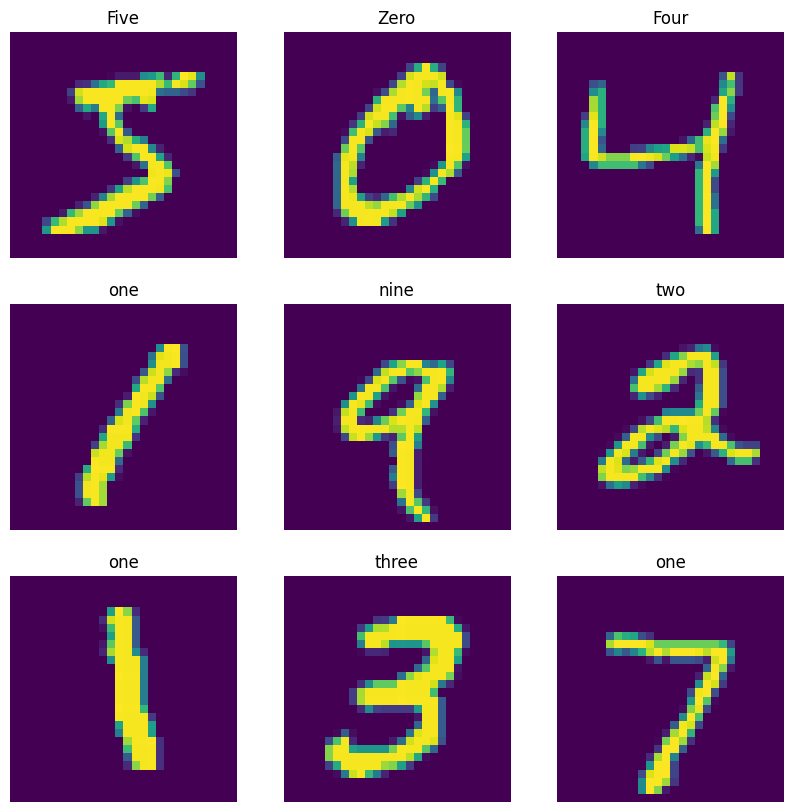

In [1]:
#importing libraries
!pip install pandas
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
import numpy as np



class_names = ['Zero','one','two','three','Four','Five','Six','seven','Eight','nine']

(x_train,y_train),(x_test,y_test) = mnist.load_data()

X_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))

X_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

print(X_train.shape)
print(X_test.shape)


# plot five data with its class name
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis("off")


#convert into grayscale
X_train=X_train/255
X_test=X_test/255


#Model
model = keras.models.Sequential([
keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"),
keras.layers.MaxPool2D(pool_size=(2,2),strides=1),
    
keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"),
keras.layers.MaxPool2D(pool_size=(2,2),strides=1),
    
keras.layers.Flatten(),
    
keras.layers.Dense(64,activation="relu"),
keras.layers.Dense(10,activation="softmax")
])

# y_train = keras.utils.to_categorical(y_train, 10)
# y_test = keras.utils.to_categorical(y_test, 10)
# model.fit(x_train,y_train,epochs=1,batch_size=32)
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

model.fit(x_train,y_train,epochs=5,callbacks=keras.callbacks.EarlyStopping(patience=2))


#evaluting the model
test_loss,test_acc=model.evaluate(x_test,y_test)
print(test_acc)

#Prediction
sample_img = X_test[0]
sample_img.shape
plt.imshow(sample_img)

img = np.expand_dims(sample_img,axis=0)
img.shape
pred = model.predict(img)
pred
print(f"Predicted: {class_names[np.argmax(pred)]} \nActual: {class_names[y_test[0]]}")

model.summary()
